<a href="https://colab.research.google.com/github/shumph10/Housing_Assistance_Analysis/blob/sarah_preprocessing/ML_joined_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Installing Hvplot in colab envir
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#Installing mock in colab env
!pip install mock

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
#import dependencies
import pandas as pd
import numpy as np
import scipy.stats as stats
import mock
from openpyxl.reader import excel
from os import path
from pathlib import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
#read in csv
rent_data = pd.read_csv("sample_data/Sec8_FMR_17&22.csv")
#Create a dataframe
rent_df = pd. DataFrame(rent_data)
rent_df.head()

,County_Name,ELI_2_17,ELI_2_22,Metro_Area_Name,State_Alpha,_id,county,county_town_name,fmr0_17,fmr1_17,...,l50_2_17,l50_2_22,l80_2_17,l80_2_22,median2017,median2022,metro,metro_code,state,state_name
0,Autauga County,16240,18310,"Montgomery, AL MSA",AL,100199999,1,Autauga County,587,682,...,23900,30200,38200,48350,59700,75500,1,METRO33860M33860,1,Alabama
1,Baldwin County,16240,20550,"Daphne-Fairhope-Foley, AL MSA",AL,100399999,3,Baldwin County,807,847,...,24600,34200,39400,54750,61500,85500,1,METRO19300M19300,1,Alabama
2,Barbour County,16240,18310,"Barbour County, AL",AL,100599999,5,Barbour County,501,505,...,18450,24650,29550,39450,46100,46400,0,NCNTY01005N01005,1,Alabama
3,Bibb County,16240,20400,"Birmingham-Hoover, AL HUD Metro FMR Area",AL,100799999,7,Bibb County,665,751,...,25250,33950,40400,54300,63100,84800,1,METRO13820M13820,1,Alabama
4,Blount County,16240,20400,"Birmingham-Hoover, AL HUD Metro FMR Area",AL,100999999,9,Blount County,665,751,...,25250,33950,40400,54300,63100,84800,1,METRO13820M13820,1,Alabama


In [17]:
#create variables for 2 bedroom rents in 2017 & 2022 for ttesting
  #will determine if there is significant difference between them
  #justifying topic 
rent_2b_2017 = rent_df['fmr2_17']
rent_2b_2022 = rent_df['fmr_2_22']

In [18]:
#find the variance for each group
print(np.var(rent_2b_2017), np.var(rent_2b_2022))

68613.16699595429 120821.53562668129


In [19]:
#preform 2 sample ttest to establish if there is a significant
  #differences in means before/post pandemic for rent
  #use equal_var=True to perform standard independent 2 sample ttests
stats.ttest_ind(a=rent_2b_2017, b=rent_2b_2022, equal_var=True)

Ttest_indResult(statistic=-21.663739572150423, pvalue=1.2576922560112365e-101)

Hypothesis: There is a statistically significant difference in rent pre/postpandemic which will in turn cause a significant difference in housing assistnace amounts.

Alternative Hypothesis: There is no statistical difference in rents pre/post pandemic.

The P-value for this ttest is far below .05, meaning we can reject the null hypothesis. This solidifies our studies topic as being of interest, and we can continue to investgate the amount of differences, causes, and put forth possible solutions to increased rent, voucher assistance amount, and its strain on governmental assistance programs.

In [20]:
rent_df.columns

Index(['County_Name', 'ELI_2_17', 'ELI_2_22', 'Metro_Area_Name', 'State_Alpha',
       '_id', 'county', 'county_town_name', 'fmr0_17', 'fmr1_17', 'fmr2_17',
       'fmr3_17', 'fmr4_17', 'fmr_0_22', 'fmr_1_22', 'fmr_2_22', 'fmr_3_22',
       'fmr_4_22', 'l50_2_17', 'l50_2_22', 'l80_2_17', 'l80_2_22',
       'median2017', 'median2022', 'metro', 'metro_code', 'state',
       'state_name'],
      dtype='object')

In [21]:
#make a copy of the df so can zip together names and codes after analysis
new_rent_df = rent_df.copy()

#drop columns for names since they have corresponding
  #numerical values
new_rent_df.drop(columns=['County_Name','Metro_Area_Name','State_Alpha','county','county_town_name','state','state_name','metro_code'], inplace=True)
new_rent_df.head()

,ELI_2_17,ELI_2_22,_id,fmr0_17,fmr1_17,fmr2_17,fmr3_17,fmr4_17,fmr_0_22,fmr_1_22,fmr_2_22,fmr_3_22,fmr_4_22,l50_2_17,l50_2_22,l80_2_17,l80_2_22,median2017,median2022,metro
0,16240,18310,100199999,587,682,822,1054,1425,643,764,914,1156,1494,23900,30200,38200,48350,59700,75500,1
1,16240,20550,100399999,807,847,977,1422,1634,772,777,1017,1348,1715,24600,34200,39400,54750,61500,85500,1
2,16240,18310,100599999,501,505,671,839,958,532,536,705,871,980,18450,24650,29550,39450,46100,46400,0
3,16240,20400,100799999,665,751,866,1163,1298,765,820,943,1220,1316,25250,33950,40400,54300,63100,84800,1
4,16240,20400,100999999,665,751,866,1163,1298,765,820,943,1220,1316,25250,33950,40400,54300,63100,84800,1


In [22]:
#dropping id column since its a unique identifier
  #and should thus not have an effect on Machine Learning Models (MLM)
new_rent_df.drop(columns=['_id'], inplace=True)
new_rent_df.head()

,ELI_2_17,ELI_2_22,fmr0_17,fmr1_17,fmr2_17,fmr3_17,fmr4_17,fmr_0_22,fmr_1_22,fmr_2_22,fmr_3_22,fmr_4_22,l50_2_17,l50_2_22,l80_2_17,l80_2_22,median2017,median2022,metro
0,16240,18310,587,682,822,1054,1425,643,764,914,1156,1494,23900,30200,38200,48350,59700,75500,1
1,16240,20550,807,847,977,1422,1634,772,777,1017,1348,1715,24600,34200,39400,54750,61500,85500,1
2,16240,18310,501,505,671,839,958,532,536,705,871,980,18450,24650,29550,39450,46100,46400,0
3,16240,20400,665,751,866,1163,1298,765,820,943,1220,1316,25250,33950,40400,54300,63100,84800,1
4,16240,20400,665,751,866,1163,1298,765,820,943,1220,1316,25250,33950,40400,54300,63100,84800,1


In [23]:
#checking for null values
new_rent_df.isnull().sum(axis=0)

ELI_2_17      0
ELI_2_22      0
fmr0_17       0
fmr1_17       0
fmr2_17       0
fmr3_17       0
fmr4_17       0
fmr_0_22      0
fmr_1_22      0
fmr_2_22      0
fmr_3_22      0
fmr_4_22      0
l50_2_17      0
l50_2_22      0
l80_2_17      0
l80_2_22      0
median2017    0
median2022    0
metro         0
dtype: int64

Duplicate values were handled in preprocessing.

In [24]:
#get number of unique categories in columns
new_rent_df.nunique()

ELI_2_17      148
ELI_2_22      206
fmr0_17       450
fmr1_17       479
fmr2_17       507
fmr3_17       678
fmr4_17       763
fmr_0_22      537
fmr_1_22      555
fmr_2_22      589
fmr_3_22      773
fmr_4_22      864
l50_2_17      364
l50_2_22      421
l80_2_17      372
l80_2_22      446
median2017    571
median2022    688
metro           2
dtype: int64

In [27]:
#get descriptive statistics for the ELI 2017
new_rent_df.ELI_2_17.describe()

count     4756.000000
mean     17343.048780
std       2765.370976
min       5800.000000
25%      16240.000000
50%      16240.000000
75%      17550.000000
max      33700.000000
Name: ELI_2_17, dtype: float64

Using MongoDB's schema for this data set, ELI for 2017 has 59% of states reporting ELi being 16240, with other values being 5% or below of remaining data.

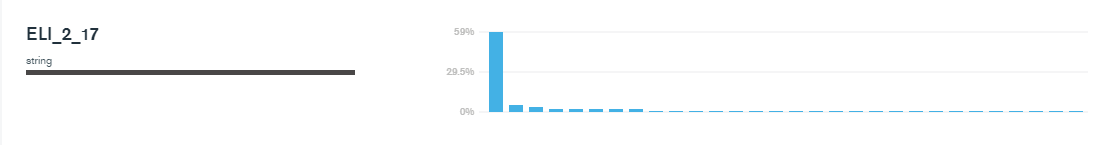

In [28]:
#get descriptive statistics for the ELI 2022
new_rent_df.ELI_2_22.describe()

count     4756.000000
mean     20855.271236
std       4306.183160
min       5950.000000
25%      18310.000000
50%      19250.000000
75%      22600.000000
max      44750.000000
Name: ELI_2_22, dtype: float64

Using MongoDB's schema for this data set, ELI for 2022 has 45% of states reporting ELi being 18310, with other values being 8% or below of remaining data.

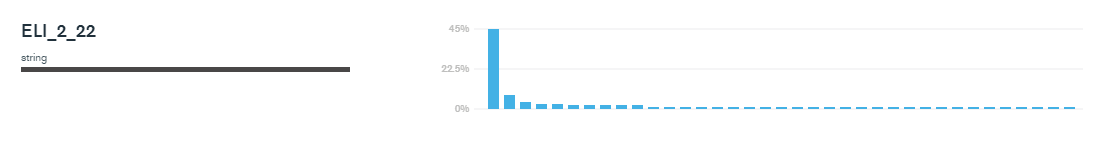